<div style=" background-color: RGB(200,10,0);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 9 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Produisez une étude de marché avec R ou Python
</h2>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Partie 1: Préparation_nettoyage_analyse_exploratoire
</h2>
</div>

<div style=" background-color: RGB(200,10,10);" >   
« La poule qui chante », une entreprise française d’agroalimentaire souhaite se développer à l'international. Aucun pays particulier ni aucun continent n'est pour le moment choisi. Tous les pays sont envisageables !

But: Proposer une première analyse des groupements de pays que l’on peut cibler pour exporter nos poulets. Nous approfondirons ensuite l'étude de marché.
</div>

<div style="background-color: RGB(200,10,10) ; ">
<h2 style="margin: auto; padding: 20px; color:#fff; "> Etape 1 - Importation des librairies et chargement des données</a> 
</div>

<div style="border: 5px solid RGB(200,10,0);" >
<h3 style="margin: auto; padding: 20px; color: RGB(200,10,0); "> 1.1 - Importation des librairies </a></h3>
</div>

In [1]:
# Importation des librairies Pandas, Matplotlib et Numpy
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
import statsmodels.api as sm
import scipy.stats as st
import numpy as np
import seaborn as sns

<div style="border: 5px solid RGB(200,10,0);" >
<h3 style="margin: auto; padding: 20px; color: RGB(200,10,0); ">1.2 - Chargement des fichiers CSV </h3>
</div>

In [2]:
#Importation du fichier Disponibilité Alimentaire 2017
DispoAlim2017=pd.read_csv('DisponibiliteAlimentaire_2017.csv')
DispoAlim2017.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [3]:
#Importation du fichier Population_2000_2018
Population2000_2018=pd.read_csv('Population_2000_2018.csv')
Population2000_2018.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [4]:
#Importation du fichier Indicateur macro
Indicateur_Macro=pd.read_csv('Indicateur macro.csv')
Indicateur_Macro.head(5)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2000,2000,US$,26192.775035,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2001,2001,US$,26981.565848,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2002,2002,US$,29372.500691,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2003,2003,US$,35886.973860,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2004,2004,US$,40577.842139,X,Ciffre de sources internationales,NaN


In [5]:
#Importation du fichier Prix Déflateurs
Prix_Déflateurs=pd.read_csv('Prix_Déflateurs.csv')
Prix_Déflateurs.head(5)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,PD,Déflateurs,528,Pays-Bas (Royaume des),6179,"Valeur US $, aux prix du 2015",22024,Déflateur du PIB,2000,2000,US$,64.661114,E,Valeur estimée
1,PD,Déflateurs,528,Pays-Bas (Royaume des),6179,"Valeur US $, aux prix du 2015",22024,Déflateur du PIB,2001,2001,US$,65.431444,E,Valeur estimée
2,PD,Déflateurs,528,Pays-Bas (Royaume des),6179,"Valeur US $, aux prix du 2015",22024,Déflateur du PIB,2002,2002,US$,71.410479,E,Valeur estimée
3,PD,Déflateurs,528,Pays-Bas (Royaume des),6179,"Valeur US $, aux prix du 2015",22024,Déflateur du PIB,2003,2003,US$,87.495580,E,Valeur estimée
4,PD,Déflateurs,528,Pays-Bas (Royaume des),6179,"Valeur US $, aux prix du 2015",22024,Déflateur du PIB,2004,2004,US$,97.418555,E,Valeur estimée


In [6]:
#Importation du fichier
TransportAlim=pd.read_csv('totaux émission transport nourriture.csv')

<div style="background-color: RGB(200,10,0);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(200,10,0);" >
<h3 style="margin: auto; padding: 20px; color: RGB(200,10,0); ">2.1 - Analyse exploratoire du fichier "DispoAlim2017"</h3>
</div>

In [7]:
DispoAlim2017['Produit'].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [8]:
DispoAlim2017=DispoAlim2017.loc[DispoAlim2017['Produit']=='Viande de Volailles']

In [9]:
#Concaténer les colonnes "Elément" et "Unité"
DispoAlim2017["Élément"] = DispoAlim2017["Élément"] +" "+ DispoAlim2017 ["Unité"] 

# Supprimer la colonne "Unité" 
DispoAlim2017.drop('Unité', axis=1, inplace=True)
DispoAlim2017

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production Milliers de tonnes,2734,Viande de Volailles,2017,2017,28.00,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité Milliers de tonnes,2734,Viande de Volailles,2017,2017,29.00,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock Milliers de tonnes,2734,Viande de Volailles,2017,2017,0.00,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure Milliers de tonnes,2734,Viande de Volailles,2017,2017,57.00,S,Données standardisées
655,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes Milliers de tonnes,2734,Viande de Volailles,2017,2017,2.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176396,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture Milliers de tonnes,2734,Viande de Volailles,2017,2017,67.00,S,Données standardisées
176397,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2734,Viande de Volailles,2017,2017,4.68,Fc,Donnée calculée
176398,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour)...,2734,Viande de Volailles,2017,2017,16.00,Fc,Donnée calculée
176399,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2734,Viande de Volailles,2017,2017,1.59,Fc,Donnée calculée


In [10]:
#Pivot table du  dataframe "DispoAlim2017"
DispoAlim2017=DispoAlim2017.pivot_table(index=["Zone",'Année'], columns="Élément", values="Valeur", aggfunc='sum')
DispoAlim2017=DispoAlim2017.reset_index()
DispoAlim2017

Élément,Zone,Année,Alimentation pour touristes Milliers de tonnes,Aliments pour animaux Milliers de tonnes,Autres utilisations (non alimentaire) Milliers de tonnes,Disponibilité alimentaire (Kcal/personne/jour) Kcal/personne/jour,Disponibilité alimentaire en quantité (kg/personne/an) kg,Disponibilité de matière grasse en quantité (g/personne/jour) g/personne/jour,Disponibilité de protéines en quantité (g/personne/jour) g/personne/jour,Disponibilité intérieure Milliers de tonnes,Exportations - Quantité Milliers de tonnes,Importations - Quantité Milliers de tonnes,Nourriture Milliers de tonnes,Pertes Milliers de tonnes,Production Milliers de tonnes,Résidus Milliers de tonnes,Semences Milliers de tonnes,Traitement Milliers de tonnes,Variation de stock Milliers de tonnes
0,Afghanistan,2017,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
1,Afrique du Sud,2017,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0
2,Albanie,2017,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
3,Algérie,2017,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
4,Allemagne,2017,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,2017,NaN,NaN,NaN,147.0,43.47,9.25,14.80,412.0,94.0,433.0,412.0,NaN,48.0,0.0,NaN,NaN,-26.0
168,Équateur,2017,0.0,NaN,NaN,83.0,19.31,6.35,6.15,341.0,0.0,0.0,324.0,17.0,340.0,0.0,NaN,NaN,-1.0
169,États-Unis d'Amérique,2017,NaN,NaN,89.0,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,18100.0,NaN,21914.0,0.0,NaN,77.0,80.0
170,Éthiopie,2017,0.0,NaN,NaN,0.0,0.13,0.03,0.04,14.0,NaN,1.0,14.0,1.0,14.0,0.0,NaN,NaN,0.0


In [11]:
#Information sur le dataframe du nombre de lignes, de colonnes, du type de valeur et du nombre de valeurs non nulles
DispoAlim2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 19 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Zone                                                                           172 non-null    object 
 1   Année                                                                          172 non-null    int64  
 2   Alimentation pour touristes Milliers de tonnes                                 78 non-null     float64
 3   Aliments pour animaux Milliers de tonnes                                       1 non-null      float64
 4   Autres utilisations (non alimentaire) Milliers de tonnes                       34 non-null     float64
 5   Disponibilité alimentaire (Kcal/personne/jour) Kcal/personne/jour              172 non-null    float64
 6   Disponibilité alimentaire 

## 1. Visualisation des données manquantes et aberrantes

In [12]:
#Vérification des valeurs manquantes
DispoAlim2017.isnull().sum()

Élément
Zone                                                                               0
Année                                                                              0
Alimentation pour touristes Milliers de tonnes                                    94
Aliments pour animaux Milliers de tonnes                                         171
Autres utilisations (non alimentaire) Milliers de tonnes                         138
Disponibilité alimentaire (Kcal/personne/jour) Kcal/personne/jour                  0
Disponibilité alimentaire en quantité (kg/personne/an) kg                          0
Disponibilité de matière grasse en quantité (g/personne/jour) g/personne/jour      0
Disponibilité de protéines en quantité (g/personne/jour) g/personne/jour           0
Disponibilité intérieure Milliers de tonnes                                        2
Exportations - Quantité Milliers de tonnes                                        37
Importations - Quantité Milliers de tonnes               

In [13]:
#Suppression des colonnes contenant beaucoup trop de valeurs manquantes
DispoAlim2017=DispoAlim2017.drop(columns=['Alimentation pour touristes Milliers de tonnes', "Disponibilité alimentaire (Kcal/personne/jour) Kcal/personne/jour","Disponibilité alimentaire en quantité (kg/personne/an) kg","Disponibilité de matière grasse en quantité (g/personne/jour) g/personne/jour",'Aliments pour animaux Milliers de tonnes','Aliments pour animaux Milliers de tonnes', "Disponibilité intérieure Milliers de tonnes",'Autres utilisations (non alimentaire) Milliers de tonnes','Pertes Milliers de tonnes',"Nourriture Milliers de tonnes","Semences Milliers de tonnes","Variation de stock Milliers de tonnes",'Résidus Milliers de tonnes',"Production Milliers de tonnes","Traitement Milliers de tonnes"] )

In [14]:
# Afficher uniquement les variables qui ont des valeurs manquantes
nb_na = DispoAlim2017.isnull().sum()
nb_na[nb_na>0]

Élément
Exportations - Quantité Milliers de tonnes    37
Importations - Quantité Milliers de tonnes     2
dtype: int64

In [15]:
#Vérifier à quoi ressemblent les valeurs manquantes dans la colonne "Importations - Quantité Milliers de tonnes"
DispoAlim2017.loc[DispoAlim2017['Exportations - Quantité Milliers de tonnes'].isnull(),:]

Élément,Zone,Année,Disponibilité de protéines en quantité (g/personne/jour) g/personne/jour,Exportations - Quantité Milliers de tonnes,Importations - Quantité Milliers de tonnes
0,Afghanistan,2017,0.54,NaN,29.0
13,Bahamas,2017,14.61,NaN,24.0
14,Bangladesh,2017,0.47,NaN,0.0
23,Burkina Faso,2017,0.77,NaN,0.0
26,Cabo Verde,2017,6.52,NaN,12.0
27,Cambodge,2017,0.74,NaN,10.0
40,Cuba,2017,7.12,NaN,312.0
43,Djibouti,2017,0.92,NaN,3.0
54,Gambie,2017,1.24,NaN,16.0
56,Grenade,2017,15.50,NaN,7.0


In [16]:
#Vérifier à quoi ressemblent les valeurs manquantes dans la colonne "Importations - Quantité Milliers de tonnes"
DispoAlim2017.loc[DispoAlim2017['Importations - Quantité Milliers de tonnes'].isnull(),:]

Élément,Zone,Année,Disponibilité de protéines en quantité (g/personne/jour) g/personne/jour,Exportations - Quantité Milliers de tonnes,Importations - Quantité Milliers de tonnes
113,Ouzbékistan,2017,0.63,NaN,NaN
130,République démocratique populaire lao,2017,3.59,NaN,NaN


## 2. Transformation des valeurs

### 2.1. Conversion des unités

In [17]:
#Création de la colonne Disponibilité alimentaire (Kcal/pays/an) qui sera une conversion de la disponibilité en Kcal/pers/jour, pour cela il faut multiplier par 365 (1an pour l'année 2017) et par le nombre de population
DispoAlim2017['Dispo de protéines en qtité (Milliers de tonnes/personne/an)']=round(DispoAlim2017['Disponibilité de protéines en quantité (g/personne/jour) g/personne/jour']*365*1000000,2)
DispoAlim2017.drop('Disponibilité de protéines en quantité (g/personne/jour) g/personne/jour', axis=1, inplace=True)

### 2.2. Suppression des valeurs NaN 

In [18]:
DispoAlim2017=DispoAlim2017.dropna()

In [19]:
DispoAlim2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 1 to 171
Data columns (total 5 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Zone                                                          135 non-null    object 
 1   Année                                                         135 non-null    int64  
 2   Exportations - Quantité Milliers de tonnes                    135 non-null    float64
 3   Importations - Quantité Milliers de tonnes                    135 non-null    float64
 4   Dispo de protéines en qtité (Milliers de tonnes/personne/an)  135 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.3+ KB


In [20]:
#Afficher les détails statistiques du dataframe "DispoAlim2017"
DispoAlim2017.describe()

Élément,Année,Exportations - Quantité Milliers de tonnes,Importations - Quantité Milliers de tonnes,Dispo de protéines en qtité (Milliers de tonnes/personne/an)
count,135.0,135.000000,135.000000,1.350000e+02
mean,2017.0,132.185185,107.392593,2.904967e+09
std,0.0,513.784440,204.110158,1.908640e+09
min,2017.0,0.000000,0.000000,5.475000e+07
25%,2017.0,0.000000,3.000000,1.516575e+09
50%,2017.0,3.000000,23.000000,2.653550e+09
75%,2017.0,32.000000,110.000000,4.095300e+09
max,2017.0,4223.000000,1069.000000,1.017255e+10


<div style="border: 1px solid RGB(200,10,0);" >
<h3 style="margin: auto; padding: 20px; color: RGB(200,10,0); ">2.2 - Analyse exploratoire du fichier "Population2000_2018"</h3>
</div>

In [21]:
#Pivot table du dataframe "Population2000_2018"
Population2000_2018=Population2000_2018.pivot_table(index=["Zone",'Année'], columns="Élément", values="Valeur", aggfunc='sum')
Population2000_2018=Population2000_2018.reset_index()
Population2000_2018

Élément,Zone,Année,Population totale
0,Afghanistan,2000,20779.953
1,Afghanistan,2001,21606.988
2,Afghanistan,2002,22600.770
3,Afghanistan,2003,23680.871
4,Afghanistan,2004,24726.684
...,...,...,...
4406,Îles Wallis-et-Futuna,2014,12.340
4407,Îles Wallis-et-Futuna,2015,12.266
4408,Îles Wallis-et-Futuna,2016,12.107
4409,Îles Wallis-et-Futuna,2017,11.900


In [22]:
Population2000_2018

Élément,Zone,Année,Population totale
0,Afghanistan,2000,20779.953
1,Afghanistan,2001,21606.988
2,Afghanistan,2002,22600.770
3,Afghanistan,2003,23680.871
4,Afghanistan,2004,24726.684
...,...,...,...
4406,Îles Wallis-et-Futuna,2014,12.340
4407,Îles Wallis-et-Futuna,2015,12.266
4408,Îles Wallis-et-Futuna,2016,12.107
4409,Îles Wallis-et-Futuna,2017,11.900


In [23]:
#Arrondir la population totale au dixième après la virgule
Population2000_2018['Population totale']=round(Population2000_2018['Population totale'],2)

In [24]:
#Détecter le nombre de valeurs manquantes par colonnes
Population2000_2018.isnull().sum()

Élément
Zone                 0
Année                0
Population totale    0
dtype: int64

In [25]:
#Information sur le dataframe du nombre de lignes, de colonnes, du type de valeur et du nombre de valeurs non nulles
Population2000_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Zone               4411 non-null   object 
 1   Année              4411 non-null   int64  
 2   Population totale  4411 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 103.5+ KB


## 1. Transformation des valeurs

In [26]:
#Multiplier la population totale de chaque pays par 1000 pour convertir les milliers de personnes en million
Population2000_2018['Population totale']=Population2000_2018['Population totale']*1000
Population2000_2018.head(5)

Élément,Zone,Année,Population totale
0,Afghanistan,2000,20779950.0
1,Afghanistan,2001,21606990.0
2,Afghanistan,2002,22600770.0
3,Afghanistan,2003,23680870.0
4,Afghanistan,2004,24726680.0


<div style="border: 1px solid RGB(200,10,0);" >
<h3 style="margin: auto; padding: 20px; color: RGB(200,10,0); ">2.3 - Analyse exploratoire du fichier "Indicateur_Macro"</h3>
</div>

In [27]:
#Renommer la colonne "Code zone (M49)" en "Code zone" pour faciliter la fusion avec les autres dataframes
Indicateur_Macro= Indicateur_Macro.rename(columns={'Code zone (M49)':"Code zone"})
Indicateur_Macro

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2000,2000,US$,26192.775035,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2001,2001,US$,26981.565848,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2002,2002,US$,29372.500691,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2003,2003,US$,35886.973860,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2004,2004,US$,40577.842139,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,MK,Indicateurs macro,716,Zimbabwe,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2018,2018,US$,1570.886029,X,Ciffre de sources internationales,NaN
4844,MK,Indicateurs macro,716,Zimbabwe,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2019,2019,US$,1471.513983,X,Ciffre de sources internationales,NaN
4845,MK,Indicateurs macro,716,Zimbabwe,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2020,2020,US$,1382.591426,X,Ciffre de sources internationales,NaN
4846,MK,Indicateurs macro,716,Zimbabwe,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2021,2021,US$,1507.994790,X,Ciffre de sources internationales,NaN


In [28]:
#Pivot table du  dataframe "Indicateur_Macro"
Indicateur_Macro=Indicateur_Macro.pivot_table(index=["Zone",'Année'], columns=['Produit'], values="Valeur", aggfunc='sum')
Indicateur_Macro=Indicateur_Macro.reset_index()
Indicateur_Macro

Produit,Zone,Année,Produit Intérieur Brut
0,Afghanistan,2000,171.009428
1,Afghanistan,2001,182.768949
2,Afghanistan,2002,197.213022
3,Afghanistan,2003,208.832635
4,Afghanistan,2004,228.775784
...,...,...,...
4843,Îles Vierges britanniques,2018,45553.650898
4844,Îles Vierges britanniques,2019,47005.648187
4845,Îles Vierges britanniques,2020,48272.963572
4846,Îles Vierges britanniques,2021,49443.868871


In [29]:
#Arrondir le "Produit Intérieur Brut" au dixième après la virgule
Indicateur_Macro["Produit Intérieur Brut"]=round(Indicateur_Macro["Produit Intérieur Brut"],2)

In [30]:
#Information sur le dataframe du nombre de lignes, de colonnes, du type de valeur et du nombre de valeurs non nulles
Indicateur_Macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4848 entries, 0 to 4847
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Zone                    4848 non-null   object 
 1   Année                   4848 non-null   int64  
 2   Produit Intérieur Brut  4848 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 113.8+ KB


In [31]:
#Détecter le nombre de valeurs manquantes par colonnes
Indicateur_Macro.isnull().sum()

Produit
Zone                      0
Année                     0
Produit Intérieur Brut    0
dtype: int64

In [32]:

Indicateur_Macro.head(6)

Produit,Zone,Année,Produit Intérieur Brut
0,Afghanistan,2000,171.01
1,Afghanistan,2001,182.77
2,Afghanistan,2002,197.21
3,Afghanistan,2003,208.83
4,Afghanistan,2004,228.78
5,Afghanistan,2005,254.82


<div style="border: 1px solid RGB(200,10,0);" >
<h3 style="margin: auto; padding: 20px; color: RGB(200,10,0); ">2.4 - Analyse exploratoire du fichier "Prix_Déflateurs"</h3>
</div>

In [33]:
#Renommer la colonne "Code zone (M49)" en "Code zone" pour faciliter la fusion avec les autres dataframes
Prix_Déflateurs=Prix_Déflateurs.rename(columns={'Code zone (M49)':"Code zone"})

In [34]:
#Pivot table du  dataframe "Prix_Déflateurs"
Prix_Déflateurs=Prix_Déflateurs.pivot_table(index=["Zone",'Année'], columns="Élément", values="Valeur", aggfunc='sum')
Prix_Déflateurs=Prix_Déflateurs.reset_index()
Prix_Déflateurs

Élément,Zone,Année,"Valeur US $, aux prix du 2015"
0,Afghanistan,2000,88.061213
1,Afghanistan,2001,99.799133
2,Afghanistan,2002,76.375172
3,Afghanistan,2003,75.902430
4,Afghanistan,2004,88.699848
...,...,...,...
4820,Îles Vierges britanniques,2018,203.416357
4821,Îles Vierges britanniques,2019,208.239175
4822,Îles Vierges britanniques,2020,212.279456
4823,Îles Vierges britanniques,2021,214.824377


In [35]:
Prix_Déflateurs.head(5)

Élément,Zone,Année,"Valeur US $, aux prix du 2015"
0,Afghanistan,2000,88.061213
1,Afghanistan,2001,99.799133
2,Afghanistan,2002,76.375172
3,Afghanistan,2003,75.902430
4,Afghanistan,2004,88.699848


In [36]:
#Arrondir le Déflateur au dixième après la virgule
Prix_Déflateurs["Valeur US $, aux prix du 2015"]=round(Prix_Déflateurs["Valeur US $, aux prix du 2015"],2)

In [37]:
Prix_Déflateurs["Prix Déflateurs($)"]=Prix_Déflateurs["Valeur US $, aux prix du 2015"]
Prix_Déflateurs.drop('Valeur US $, aux prix du 2015', axis=1, inplace=True)

In [38]:
#Information sur le dataframe du nombre de lignes, de colonnes, du type de valeur et du nombre de valeurs non nulles
Prix_Déflateurs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4825 entries, 0 to 4824
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Zone                4825 non-null   object 
 1   Année               4825 non-null   int64  
 2   Prix Déflateurs($)  4825 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 113.2+ KB


In [39]:
#Détecter le nombre de valeurs manquantes par colonnes
Prix_Déflateurs.isnull().sum()

Élément
Zone                  0
Année                 0
Prix Déflateurs($)    0
dtype: int64

<div style="border: 1px solid RGB(200,10,0);" >
<h3 style="margin: auto; padding: 20px; color: RGB(200,10,0); ">2.6 - Analyse exploratoire du fichier "TransportAlim"</h3>
</div>

In [40]:
TransportAlim.head(5)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Code source,Source,Unité,Valeur,Symbole,Description du Symbole,Note
0,GT,Totaux des émissions,528,Pays-Bas (Royaume des),7273,Émissions (CO2),6815,Transporte des alimentaires,2015,2015,3050,FAO TIER 1,kilotonnes,2302.8847,E,Valeur estimée,NaN
1,GT,Totaux des émissions,528,Pays-Bas (Royaume des),7273,Émissions (CO2),6815,Transporte des alimentaires,2016,2016,3050,FAO TIER 1,kilotonnes,2300.0887,E,Valeur estimée,NaN
2,GT,Totaux des émissions,528,Pays-Bas (Royaume des),7273,Émissions (CO2),6815,Transporte des alimentaires,2017,2017,3050,FAO TIER 1,kilotonnes,2362.7082,E,Valeur estimée,NaN
3,GT,Totaux des émissions,528,Pays-Bas (Royaume des),7273,Émissions (CO2),6815,Transporte des alimentaires,2018,2018,3050,FAO TIER 1,kilotonnes,2418.9321,E,Valeur estimée,NaN
4,GT,Totaux des émissions,528,Pays-Bas (Royaume des),7273,Émissions (CO2),6815,Transporte des alimentaires,2019,2019,3050,FAO TIER 1,kilotonnes,2401.7632,E,Valeur estimée,NaN


In [41]:
TransportAlim.isnull().sum()

Code Domaine                 0
Domaine                      0
Code zone (M49)              0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Code source                  0
Source                       0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      1308
dtype: int64

In [42]:

#Concaténer les colonnes "Elément" et "Unité"
TransportAlim["Élément"] = TransportAlim["Élément"] +" "+ TransportAlim["Unité"]+TransportAlim["Produit"]

# Supprimer la colonne "Unité" 
TransportAlim.drop('Unité', axis=1, inplace=True)
TransportAlim.head(5)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Code source,Source,Valeur,Symbole,Description du Symbole,Note
0,GT,Totaux des émissions,528,Pays-Bas (Royaume des),7273,Émissions (CO2) kilotonnesTransporte des alime...,6815,Transporte des alimentaires,2015,2015,3050,FAO TIER 1,2302.8847,E,Valeur estimée,NaN
1,GT,Totaux des émissions,528,Pays-Bas (Royaume des),7273,Émissions (CO2) kilotonnesTransporte des alime...,6815,Transporte des alimentaires,2016,2016,3050,FAO TIER 1,2300.0887,E,Valeur estimée,NaN
2,GT,Totaux des émissions,528,Pays-Bas (Royaume des),7273,Émissions (CO2) kilotonnesTransporte des alime...,6815,Transporte des alimentaires,2017,2017,3050,FAO TIER 1,2362.7082,E,Valeur estimée,NaN
3,GT,Totaux des émissions,528,Pays-Bas (Royaume des),7273,Émissions (CO2) kilotonnesTransporte des alime...,6815,Transporte des alimentaires,2018,2018,3050,FAO TIER 1,2418.9321,E,Valeur estimée,NaN
4,GT,Totaux des émissions,528,Pays-Bas (Royaume des),7273,Émissions (CO2) kilotonnesTransporte des alime...,6815,Transporte des alimentaires,2019,2019,3050,FAO TIER 1,2401.7632,E,Valeur estimée,NaN


In [43]:
TransportAlim=TransportAlim.pivot_table(index=["Zone",'Année'], columns="Élément", values="Valeur", aggfunc='sum')
TransportAlim=TransportAlim.reset_index()

In [44]:
TransportAlim['Émissions CO2 (kt) Transport alim']=TransportAlim['Émissions (CO2) kilotonnesTransporte des alimentaires']
TransportAlim.drop('Émissions (CO2) kilotonnesTransporte des alimentaires', axis=1, inplace=True)
TransportAlim.head(5)

Élément,Zone,Année,Émissions CO2 (kt) Transport alim
0,Afghanistan,2015,427.3708
1,Afghanistan,2016,331.8737
2,Afghanistan,2017,336.0500
3,Afghanistan,2018,395.5444
4,Afghanistan,2019,475.6127


<div style="background-color: RGB(200,10,0);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Etude des données </h2>
</div>

<div style="border: 5px solid RGB(200,10,0);" >
<h3 style="margin: auto; padding: 20px; color: RGB(200,10,0); "> <a href="#C3"> 3.1. Fusion des 2 dataframes "DispoAlim2017" et "Population2000_2018"  </a> </h3>
</div>

In [45]:
DispoAlim2017.head(5)

Élément,Zone,Année,Exportations - Quantité Milliers de tonnes,Importations - Quantité Milliers de tonnes,Dispo de protéines en qtité (Milliers de tonnes/personne/an)
1,Afrique du Sud,2017,63.0,514.0,5.150150e+09
2,Albanie,2017,0.0,38.0,2.284900e+09
3,Algérie,2017,0.0,2.0,7.190500e+08
4,Allemagne,2017,646.0,842.0,2.905400e+09
5,Angola,2017,0.0,277.0,1.314000e+09


In [46]:
Population2000_2018.head(5)

Élément,Zone,Année,Population totale
0,Afghanistan,2000,20779950.0
1,Afghanistan,2001,21606990.0
2,Afghanistan,2002,22600770.0
3,Afghanistan,2003,23680870.0
4,Afghanistan,2004,24726680.0


In [47]:
#Fusion des dataframes "DispoAlim2017" et "Population2000_2018".
DispoAlim_Pop2017=DispoAlim2017.merge(Population2000_2018, on=['Zone', 'Année'], how="inner")
DispoAlim_Pop2017

Élément,Zone,Année,Exportations - Quantité Milliers de tonnes,Importations - Quantité Milliers de tonnes,Dispo de protéines en qtité (Milliers de tonnes/personne/an),Population totale
0,Afrique du Sud,2017,63.0,514.0,5.150150e+09,57009760.0
1,Albanie,2017,0.0,38.0,2.284900e+09,2884170.0
2,Algérie,2017,0.0,2.0,7.190500e+08,41389190.0
3,Allemagne,2017,646.0,842.0,2.905400e+09,82658410.0
4,Angola,2017,0.0,277.0,1.314000e+09,29816770.0
...,...,...,...,...,...,...
130,Égypte,2017,1.0,110.0,1.646150e+09,96442590.0
131,Émirats arabes unis,2017,94.0,433.0,5.402000e+09,9487200.0
132,Équateur,2017,0.0,0.0,2.244750e+09,16785360.0
133,États-Unis d'Amérique,2017,3692.0,123.0,7.274450e+09,325084760.0


In [48]:
#Détecter le nombre de valeurs manquantes par colonnes après fusion des deux dataframes "DispoAlim2017" et "Population2000_2018"
DispoAlim_Pop2017.isnull().sum()

Élément
Zone                                                            0
Année                                                           0
Exportations - Quantité Milliers de tonnes                      0
Importations - Quantité Milliers de tonnes                      0
Dispo de protéines en qtité (Milliers de tonnes/personne/an)    0
Population totale                                               0
dtype: int64

In [49]:
# Fusion des dataframes "DispoAlim_Pop2017" et "Indicateur_Macro".
DispoAlim_Pop2017=DispoAlim_Pop2017.merge(Indicateur_Macro, on=['Zone', 'Année'], how="inner")

In [50]:
# Fusion des dataframes "DispoAlim_Pop2017" et "Prix_Déflateur".
DispoAlim_Pop2017=DispoAlim_Pop2017.merge(Prix_Déflateurs, on=['Zone', 'Année'], how="inner")


In [51]:
# Fusion des dataframes "DispoAlim_Pop2017" et "TransportAlim".
DispoAlim_Pop2017=DispoAlim_Pop2017.merge(TransportAlim, on=['Zone', 'Année'], how="inner")

## Conversion des unités

In [52]:
#Création de la colonne Disponibilité alimentaire (Kcal/pays/an) qui sera une conversion de la disponibilité en Kcal/pers/jour, pour cela il faut multiplier par 365 (1an pour l'année 2017) et par le nombre de population
DispoAlim_Pop2017['Dispo de protéines en qtité (Milliers de tonnes/pop/an)']=round(DispoAlim_Pop2017['Dispo de protéines en qtité (Milliers de tonnes/personne/an)']*DispoAlim_Pop2017['Population totale'],2)
DispoAlim_Pop2017.drop('Dispo de protéines en qtité (Milliers de tonnes/personne/an)', axis=1, inplace=True)

In [53]:
#Suppression de la colonne "Année"
DispoAlim_Pop2017.drop('Année', axis=1, inplace=True)

In [54]:
#Détecter le nombre de valeurs manquantes par colonnes après la fusion des dataframes "Indicateur_Macro" et "Prix_Déflateur".
DispoAlim_Pop2017.isnull().sum()

Zone                                                       0
Exportations - Quantité Milliers de tonnes                 0
Importations - Quantité Milliers de tonnes                 0
Population totale                                          0
Produit Intérieur Brut                                     0
Prix Déflateurs($)                                         0
Émissions CO2 (kt) Transport alim                          0
Dispo de protéines en qtité (Milliers de tonnes/pop/an)    0
dtype: int64

In [55]:
#Afficher les détails statistiques du dataframe "DispoAlim_Pop2017"
DispoAlim_Pop2017.describe()

,Exportations - Quantité Milliers de tonnes,Importations - Quantité Milliers de tonnes,Population totale,Produit Intérieur Brut,Prix Déflateurs($),Émissions CO2 (kt) Transport alim,Dispo de protéines en qtité (Milliers de tonnes/pop/an)
count,132.000000,132.000000,1.320000e+02,132.000000,132.000000,132.000000,1.320000e+02
mean,124.386364,103.977273,5.040789e+07,16349.214015,202.718106,3437.560389,1.042955e+17
std,507.036994,201.461396,1.733716e+08,20614.147126,19.953637,7171.165273,2.969745e+17
min,0.000000,0.000000,7.146000e+04,487.010000,106.380000,5.859400,3.004750e+14
25%,0.000000,3.000000,3.865700e+06,3511.422500,198.585000,231.349750,5.982603e+15
50%,2.500000,22.000000,9.815580e+06,6849.850000,205.925000,794.185750,2.021927e+16
75%,30.500000,108.500000,3.586896e+07,19176.435000,210.767500,3161.031575,8.270246e+16
max,4223.000000,1069.000000,1.421022e+09,110203.010000,271.690000,57457.448600,2.364813e+18


In [56]:
#Information sur le dataframe "DispoAlim_Pop2017" du nombre de lignes, de colonnes, du type de valeur et du nombre de valeurs non nulles
DispoAlim_Pop2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 131
Data columns (total 8 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Zone                                                     132 non-null    object 
 1   Exportations - Quantité Milliers de tonnes               132 non-null    float64
 2   Importations - Quantité Milliers de tonnes               132 non-null    float64
 3   Population totale                                        132 non-null    float64
 4   Produit Intérieur Brut                                   132 non-null    float64
 5   Prix Déflateurs($)                                       132 non-null    float64
 6   Émissions CO2 (kt) Transport alim                        132 non-null    float64
 7   Dispo de protéines en qtité (Milliers de tonnes/pop/an)  132 non-null    float64
dtypes: float64(7), object(1)
memory

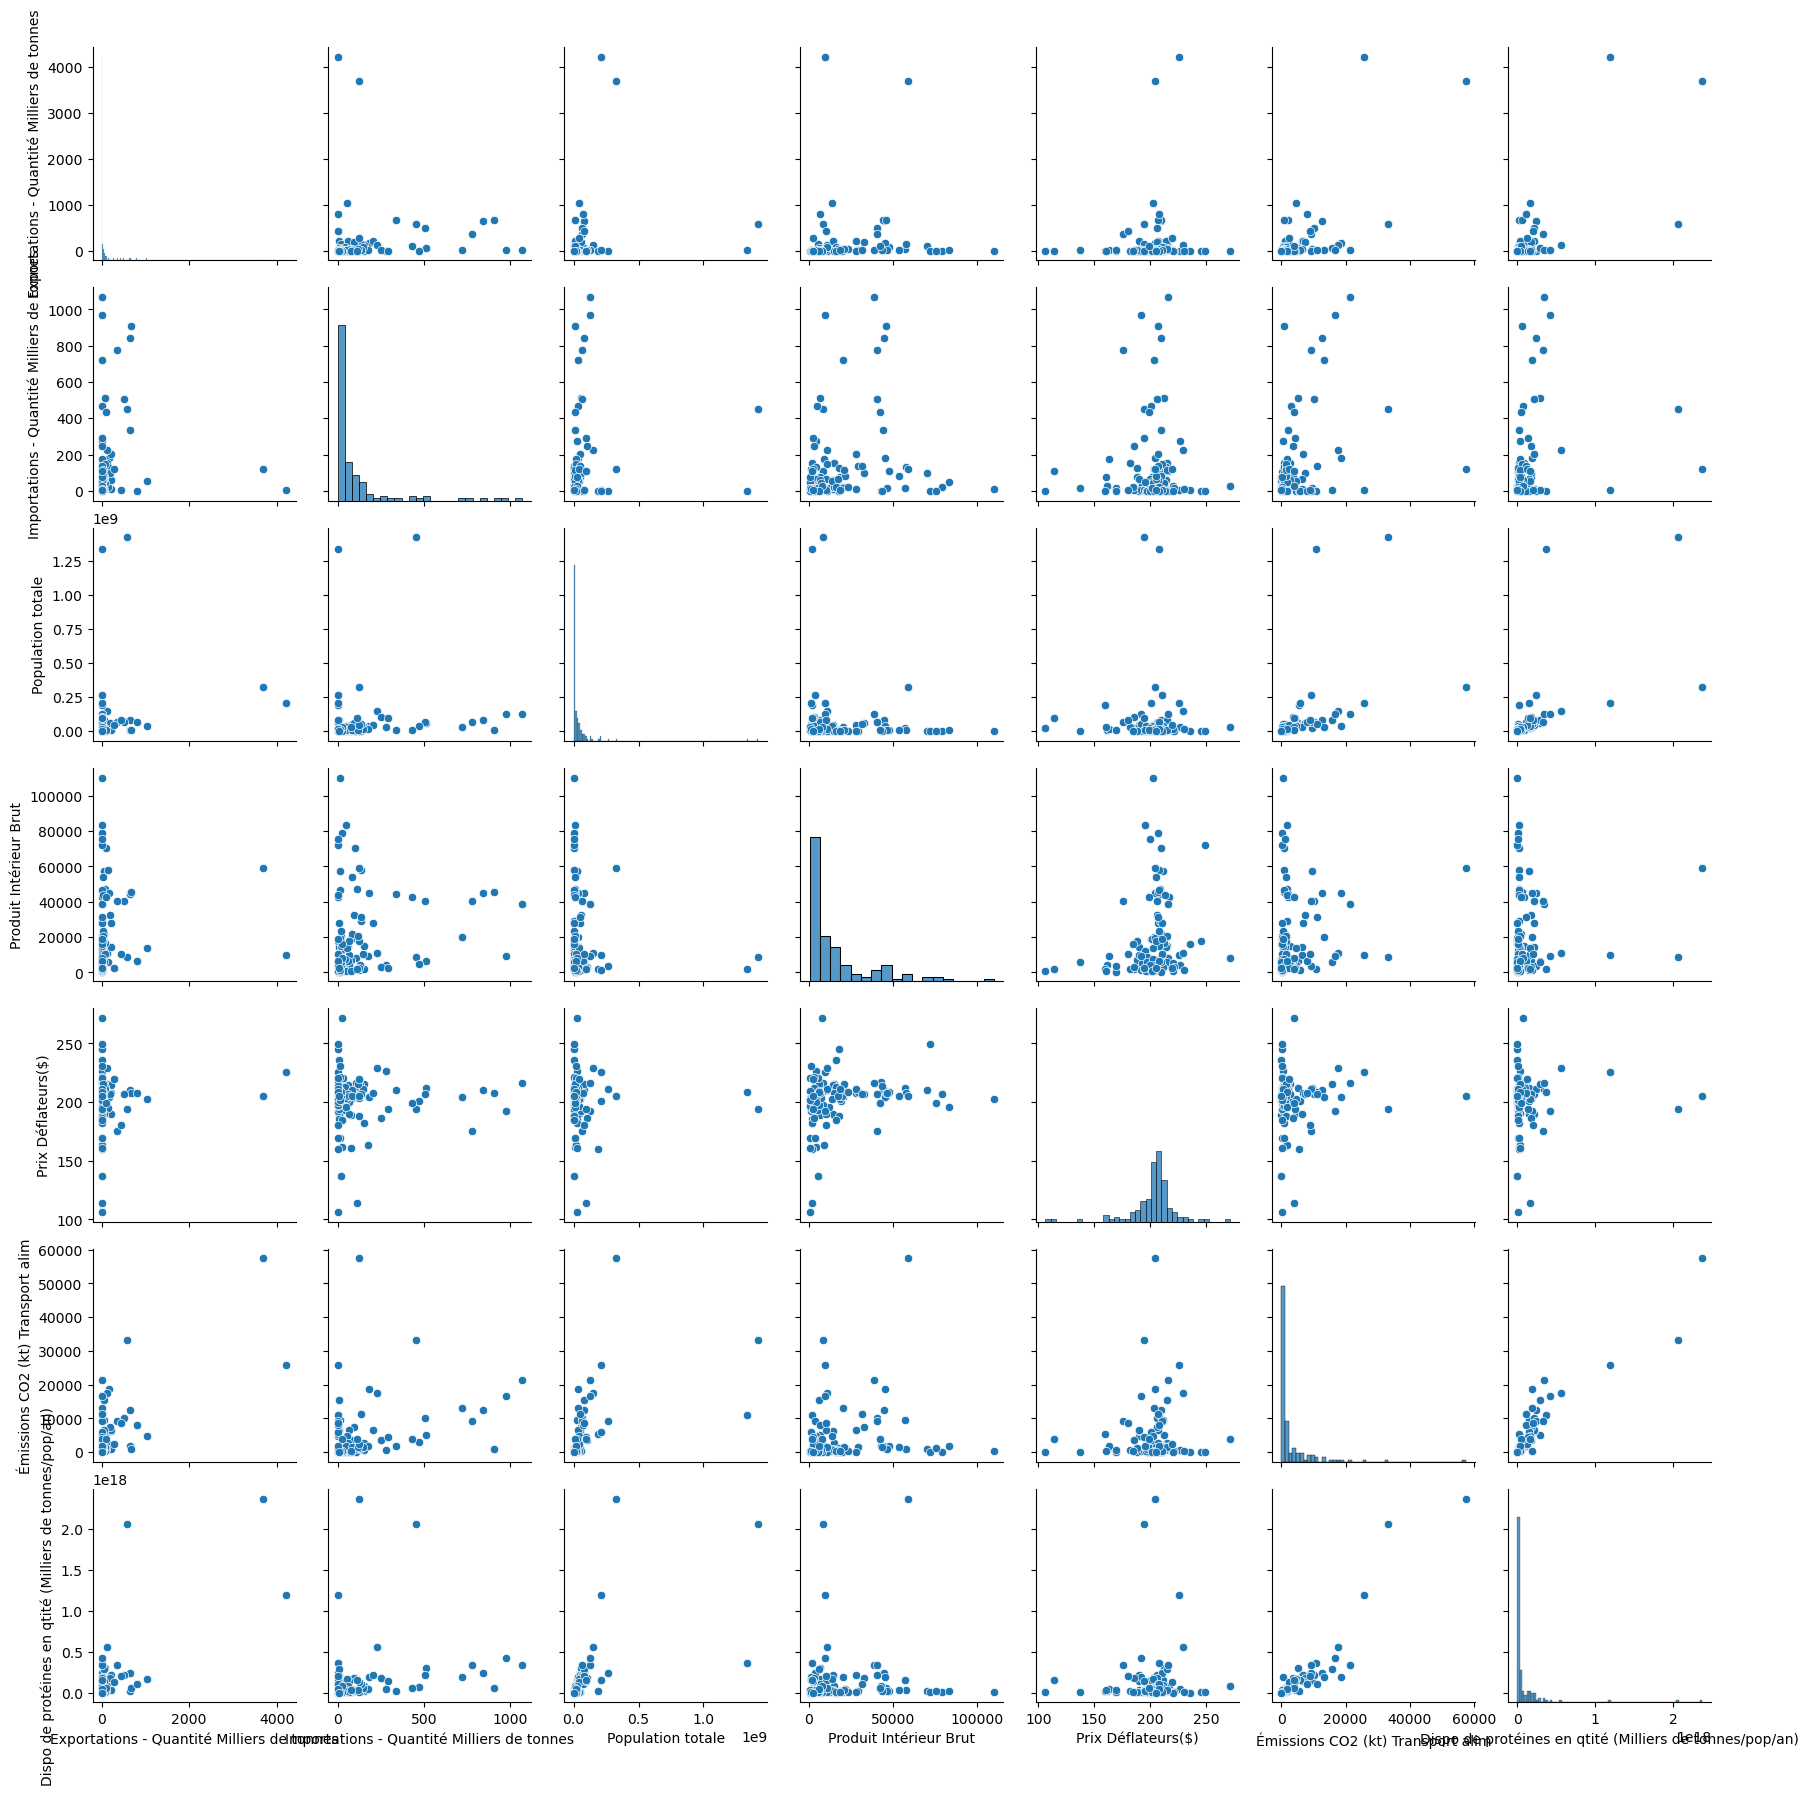

In [57]:
sns.pairplot(DispoAlim_Pop2017)
plt.show()

## Création du dataframe final

In [58]:
#Création d'un fichier CSV
DispoAlim_Pop2017.to_csv('DispoAlim_Pop2017.csv', index=False)
